# Importamos las librerias


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')

## Ahora limpiaremos el DataFrame

In [3]:
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [19]:
df_limpia = df.drop(['PassengerId','Cabin','Embarked','Name','Ticket','SibSp','Parch'], axis=1)

In [20]:
df_limpia.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [21]:
df_limpia.Age = df_limpia['Age'].fillna(df_limpia.Age.mean())

In [22]:
df_limpia.Sex = df_limpia.Sex.map({'male' : 1, 'female' : 2})

In [23]:
df_limpia.describe()

,Survived,Pclass,Sex,Age,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,1.352413,29.699118,32.204208
std,0.486592,0.836071,0.477990,13.002015,49.693429
min,0.000000,1.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,1.000000,22.000000,7.910400
50%,0.000000,3.000000,1.000000,29.699118,14.454200
75%,1.000000,3.000000,2.000000,35.000000,31.000000
max,1.000000,3.000000,2.000000,80.000000,512.329200


In [24]:
corr = round(df_limpia.corr(),4)
corr.style.background_gradient()

,Survived,Pclass,Sex,Age,Fare
Survived,1.000000,-0.338500,0.543400,-0.069800,0.257300
Pclass,-0.338500,1.000000,-0.131900,-0.331300,-0.549500
Sex,0.543400,-0.131900,1.000000,-0.084200,0.182300
Age,-0.069800,-0.331300,-0.084200,1.000000,0.091600
Fare,0.257300,-0.549500,0.182300,0.091600,1.000000


### Ahora iremos preparando los datos

In [25]:
data_x = df_limpia.drop('Survived', axis=1)
data_y = df_limpia.Survived

In [26]:
data_x , data_y

(     Pclass  Sex        Age     Fare
 0         3    1  22.000000   7.2500
 1         1    2  38.000000  71.2833
 2         3    2  26.000000   7.9250
 3         1    2  35.000000  53.1000
 4         3    1  35.000000   8.0500
 ..      ...  ...        ...      ...
 886       2    1  27.000000  13.0000
 887       1    2  19.000000  30.0000
 888       3    2  29.699118  23.4500
 889       1    1  26.000000  30.0000
 890       3    1  32.000000   7.7500
 
 [891 rows x 4 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

### inicializamos el modelo

In [27]:
decission_model = DecisionTreeClassifier()

como este es un modelo clasificatorio le damos un 90% de los datos para entrenarse y solo 10% para testeo

In [77]:
train_x, test_x, train_y, test_y = train_test_split(data_x,data_y,test_size=0.1)

In [78]:
decission_model.fit(train_x,train_y)

DecisionTreeClassifier()

# ahora predecimos

In [79]:
y_predict = decission_model.predict(test_x)

In [80]:
print(f'Score del modelo de entrenamiento: {round(decission_model.score(test_x,test_y),4)*100} %')

Score del modelo de entrenamiento: 82.22 %


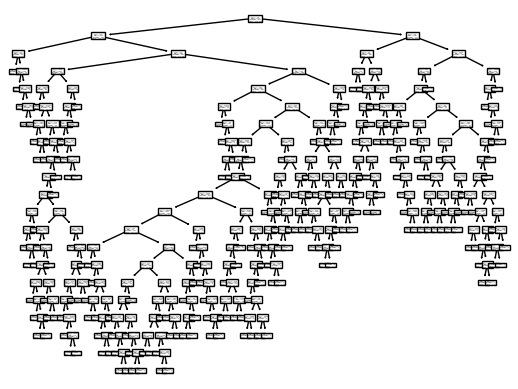

In [83]:
tree.plot_tree(decission_model)
plt.show()